### 1.Inspiration /Problem Statement:The goal is to use best regression model and predict Flight Fare Price.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas_profiling as pp
import plotly.express as px
sn.set()
RANDOM_SEED = 42

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

from subprocess import check_output
from sklearn import metrics
import joblib
import pickle
import time
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import RobustScaler

In [2]:
import os
#Setting current working directory
os.chdir("/Users/Zahed/Flight_Price _Prediction Project")

### 2. Data Loading and Description

#### Importing Dataset

In [3]:
# read an excel file and convert 
# into a dataframe object
df = pd.DataFrame(pd.read_excel("Data_Train.xlsx"))
# show the dataframe
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
#Having a copy of Original Data Frame for Future Analysis Purpose
new_df = df.copy()

#### Dimensionality Check

In [5]:
df.shape

(10683, 11)

##### Observation:The dataset consist of 10683 observations of 11 columns.

#### Variables/Features of the Dataset

In [6]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

### Data Overview Using Pandas Profiling for quick review on EDA

In [7]:
pp.ProfileReport(df)

### 3.Preprocessing data

* Checking Missing Values & handling it.
* Changing data types of 'Date_of_Journey','Dep_Time' & 'Arrival_Time' from object type to datetime.
* Etracting day,month,hour & Mins data from 'Date_of_Journey','Dep_Time' & 'Arrival_Time' columns.
* Dropping insignigicant columns with less or no usefull data in it after extracting the data.
* Transforming Data/Converting Categorical Columns into Numerical Column.

#### Checking Missing Values

In [8]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

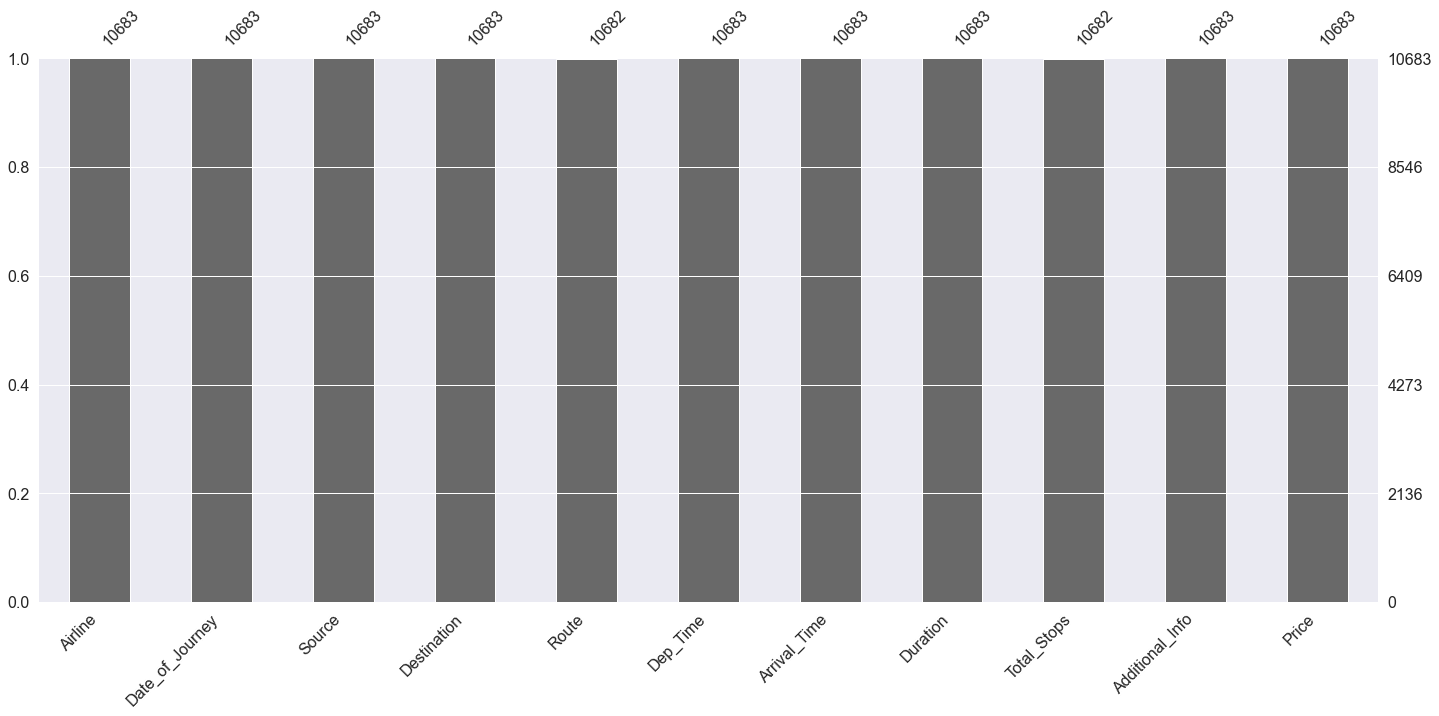

In [9]:
import missingno as msno
msno.bar(df)
plt.show

##### Observation:We can observe that there is a row missing in both Route & Total_stops column, we can fill these columns as they are categorical data using mode.

In [10]:
# fill the missing values for the Categorical terms-mode
df['Total_Stops'] = df['Total_Stops'].fillna(df['Total_Stops'].mode()[0])
df['Route'] = df['Route'].fillna(df['Route'].mode()[0])

In [11]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

##### Observation:We can observe that there are no missing data in the entire dataset.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10683 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10683 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


##### Observation:We can observe that all the columns are of  Object data type except target column.

* We can see datatypes of Date_of_journey,Arrival_Time and Dep_Time is also object.So,firstly we convert it into date and time for proper prediction.
* (dt.day) method will extract only day of that date
* (dt.month) method will extract only month of that date

In [13]:
def change_into_datetime(col):
    df[col]=pd.to_datetime(df[col])

In [14]:
for i in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    change_into_datetime(i)

In [15]:
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

* Now ,we can extract the day and the month data from Date_of_journey column and store it in 2 other columns.
* Then there will be no use of 'Date_of_Journey' column after extracting day & month data,so we can drop it

In [16]:
df['journey_day']=df['Date_of_Journey'].dt.day
df['journey_month']=df['Date_of_Journey'].dt.month

In [17]:
df.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-06-30 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-06-30 05:50:00,2021-06-30 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-06-30 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-06-30 18:05:00,2021-06-30 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-06-30 16:50:00,2021-06-30 21:35:00,4h 45m,1 stop,No info,13302,3,1
5,SpiceJet,2019-06-24,Kolkata,Banglore,CCU → BLR,2021-06-30 09:00:00,2021-06-30 11:25:00,2h 25m,non-stop,No info,3873,24,6
6,Jet Airways,2019-12-03,Banglore,New Delhi,BLR → BOM → DEL,2021-06-30 18:55:00,2021-03-13 10:25:00,15h 30m,1 stop,In-flight meal not included,11087,3,12
7,Jet Airways,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,2021-06-30 08:00:00,2021-03-02 05:05:00,21h 5m,1 stop,No info,22270,3,1
8,Jet Airways,2019-12-03,Banglore,New Delhi,BLR → BOM → DEL,2021-06-30 08:55:00,2021-03-13 10:25:00,25h 30m,1 stop,In-flight meal not included,11087,3,12
9,Multiple carriers,2019-05-27,Delhi,Cochin,DEL → BOM → COK,2021-06-30 11:25:00,2021-06-30 19:15:00,7h 50m,1 stop,No info,8625,27,5


In [18]:
#Dropping  Date_of_Journey column as it has duplicate data
df.drop('Date_of_Journey', axis=1, inplace=True)

* Similarly from Arrival_time and Dept_time Columns,we extract Hour and Minutes and store it in new columns and drop these columns

In [19]:
# function for extracting hour and minutes
def extract_hour(data,col):
    data[col+'_hour']=data[col].dt.hour
    
def extract_min(data,col):
    data[col+'_min']=data[col].dt.minute
    

def drop_col(data,col):
    data.drop(col,axis=1,inplace=True)

In [20]:
#call the function
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time
extract_hour(df,'Dep_Time')

#extracting minutes
extract_min(df,'Dep_Time')

#drop the column
drop_col(df,'Dep_Time')

In [21]:
#extracting hour
extract_hour(df,'Arrival_Time')

#extracting min
extract_min(df,'Arrival_Time')


#drop the column
drop_col(df,'Arrival_Time')

In [22]:
df.head(10)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35
5,SpiceJet,Kolkata,Banglore,CCU → BLR,2h 25m,non-stop,No info,3873,24,6,9,0,11,25
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,15h 30m,1 stop,In-flight meal not included,11087,3,12,18,55,10,25
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,21h 5m,1 stop,No info,22270,3,1,8,0,5,5
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,25h 30m,1 stop,In-flight meal not included,11087,3,12,8,55,10,25
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,7h 50m,1 stop,No info,8625,27,5,11,25,19,15


* Lets Apply pre-processing on duration column,Separate Duration hours and minute from duration

In [23]:
duration=list(df['Duration'])
for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]: # Check if duration contains only hour
             duration[i]=duration[i] + ' 0m' # Adds 0 minute
        else:
             duration[i]='0h '+ duration[i]

In [24]:
duration[:10]

['2h 50m',
 '7h 25m',
 '19h 0m',
 '5h 25m',
 '4h 45m',
 '2h 25m',
 '15h 30m',
 '21h 5m',
 '25h 30m',
 '7h 50m']

In [25]:
df['Duration']=duration

In [26]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [27]:
def hour(x):
    return x.split(' ')[0][0:-1]

def minutes(x):
    return x.split(' ')[1][0:-1]

In [28]:
df['dur_hour']=df['Duration'].apply(hour)

In [29]:
df['dur_min']=df['Duration'].apply(minutes)

In [30]:
df.head(10)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35,4,45
5,SpiceJet,Kolkata,Banglore,CCU → BLR,2h 25m,non-stop,No info,3873,24,6,9,0,11,25,2,25
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,15h 30m,1 stop,In-flight meal not included,11087,3,12,18,55,10,25,15,30
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,21h 5m,1 stop,No info,22270,3,1,8,0,5,5,21,5
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,25h 30m,1 stop,In-flight meal not included,11087,3,12,8,55,10,25,25,30
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,7h 50m,1 stop,No info,8625,27,5,11,25,19,15,7,50


In [31]:
#Dropping  Duration column as it has duplicate data
drop_col(df,'Duration')

In [32]:
df.dtypes

Airline              object
Source               object
Destination          object
Route                object
Total_Stops          object
Additional_Info      object
Price                 int64
journey_day           int64
journey_month         int64
Dep_Time_hour         int64
Dep_Time_min          int64
Arrival_Time_hour     int64
Arrival_Time_min      int64
dur_hour             object
dur_min              object
dtype: object

In [33]:
#Converting the datatype of hour and min column into int data type as its still Object type.
df['dur_hour'] = df['dur_hour'].astype('int64')
df['dur_min'] = df['dur_min'].astype('int64')
df.dtypes

Airline              object
Source               object
Destination          object
Route                object
Total_Stops          object
Additional_Info      object
Price                 int64
journey_day           int64
journey_month         int64
Dep_Time_hour         int64
Dep_Time_min          int64
Arrival_Time_hour     int64
Arrival_Time_min      int64
dur_hour              int64
dur_min               int64
dtype: object

In [34]:
#Finding the categorical Columns in dataset
column=[column for column in df.columns if df[column].dtype=='object']
column

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [35]:
#Finding the continuous value columns in dataset
continuous_col =[column for column in df.columns if df[column].dtype!='object']
continuous_col

['Price',
 'journey_day',
 'journey_month',
 'Dep_Time_hour',
 'Dep_Time_min',
 'Arrival_Time_hour',
 'Arrival_Time_min',
 'dur_hour',
 'dur_min']

#### Handling categorical data

* We are using two main Encoding Techniques to covert Categorical data into some numerical format
* Nominal data -- Data that are not in any order -->one hot encoding
* ordinal data -- Data are in order --> labelEncoder

In [36]:
categorical = df[column]

In [37]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


### Value Count Function

In [38]:
# print all of the data types and their Unique values
for column in df.columns:
    if df[column].dtype == object:
        print(str(column)+ ':'+str(df[column].unique()))
        print(df[column].value_counts())
        print('---------------------------------------------------------------------------------------------')

Airline:['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
---------------------------------------------------------------------------------------------
Source:['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64
----

<AxesSubplot:xlabel='Airline', ylabel='Price'>

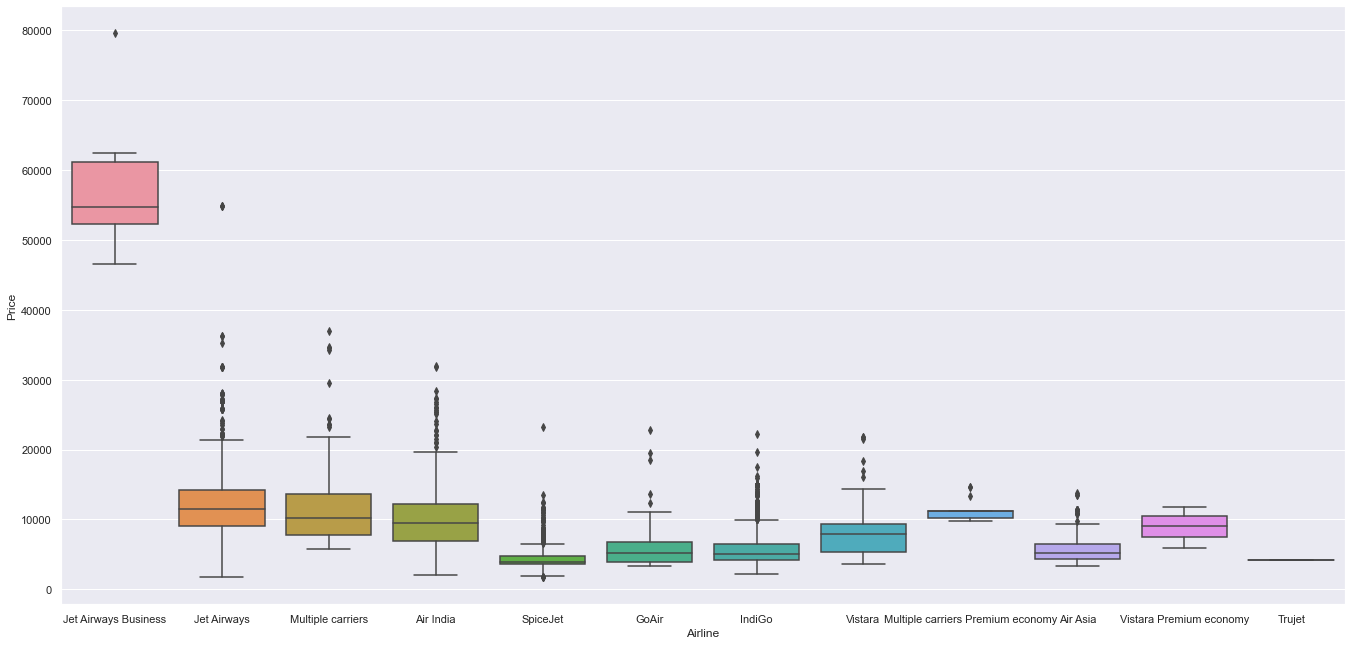

In [39]:
# Airline vs Price Analysis
plt.figure(figsize=(23,11))
sn.boxplot(x='Airline',y='Price',data=df.sort_values('Price',ascending=False))

#### Observation: From graph we can see that Jet Airways Business have the highest Price, Apart from the first Airline almost all are having similar median

<Figure size 1080x1080 with 0 Axes>

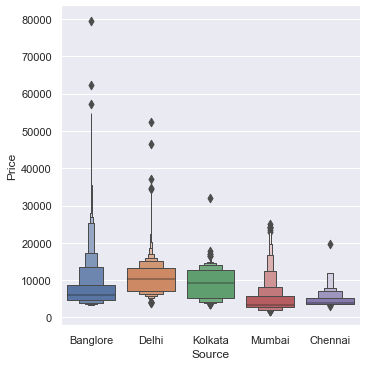

In [40]:
# Source vs Price Analysis
plt.figure(figsize=(15,15))
sn.catplot(x='Source',y='Price',data=df.sort_values('Price',ascending=False),kind='boxen')

#### Observation: From graph we can see that people traveling from Delhi (Source) have the highest Price

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

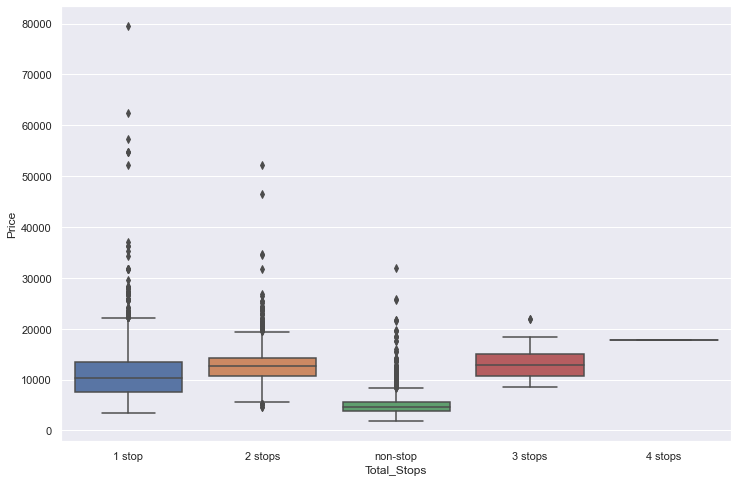

In [41]:
#Total_Stops vs Price Analysis
plt.figure(figsize=(12,8))
sn.boxplot(x='Total_Stops',y='Price',data=df.sort_values('Price',ascending=False))

#### Observation: From graph we can see that passengers with Total_stops equal to 3 & 4 stops have the highest Price

<AxesSubplot:xlabel='Destination', ylabel='Price'>

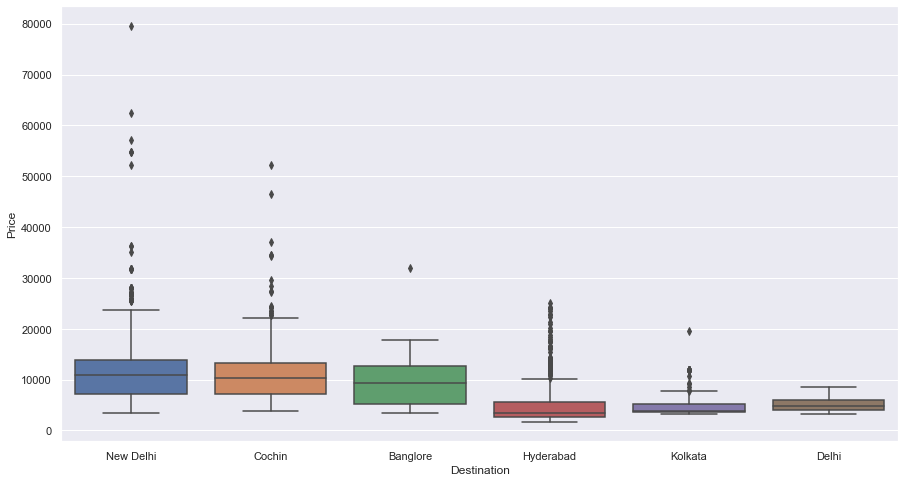

In [42]:
# Destination vs Price Analysis
plt.figure(figsize=(15,8))
sn.boxplot(x='Destination',y='Price',data=df.sort_values('Price',ascending=False))

#### Observation: From graph we can see that people traveling back to Delhi (Destination) have the highest Price

#### OneHotEncoding for Nominal Categorical data

In [43]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding
Airline=pd.get_dummies(categorical['Airline'],drop_first=True)

In [44]:
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [45]:
#encoding of source column
source=pd.get_dummies(categorical['Source'],drop_first=True)
source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [46]:
#encoding of destination column
destination=pd.get_dummies(categorical['Destination'],drop_first=True)
destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [47]:
# now let us work on the route column
categorical['Route'].value_counts()

DEL → BOM → COK                      2377
BLR → DEL                            1552
CCU → BOM → BLR                       979
CCU → BLR                             724
BOM → HYD                             621
                                     ... 
CCU → IXZ → MAA → BLR                   1
BLR → CCU → BBI → HYD → VGA → DEL       1
BOM → DED → DEL → HYD                   1
BOM → VNS → DEL → HYD                   1
BOM → CCU → HYD                         1
Name: Route, Length: 128, dtype: int64

In [48]:
categorical['Route1']=categorical['Route'].str.split('→').str[0]
categorical['Route2']=categorical['Route'].str.split('→').str[1]
categorical['Route3']=categorical['Route'].str.split('→').str[2]
categorical['Route4']=categorical['Route'].str.split('→').str[3]
categorical['Route5']=categorical['Route'].str.split('→').str[4]

In [49]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [50]:
drop_col(categorical,'Route')

In [51]:
categorical.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Route1                 0
Route2                 0
Route3              3491
Route4              9117
Route5             10637
dtype: int64

In [52]:
#Displaying categorical columns
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route1', 'Route2', 'Route3', 'Route4', 'Route5'],
      dtype='object')

In [53]:
for i in ['Route3', 'Route4', 'Route5']:
    categorical[i].fillna('None',inplace=True)

In [54]:
categorical.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Route1             0
Route2             0
Route3             0
Route4             0
Route5             0
dtype: int64

In [55]:
#Displaying all the categorical columns along with its categories
for i in categorical.columns:
    print('{} has total {} categories'.format(i,len(categorical[i].value_counts())))

Airline has total 12 categories
Source has total 5 categories
Destination has total 6 categories
Total_Stops has total 5 categories
Additional_Info has total 10 categories
Route1 has total 5 categories
Route2 has total 45 categories
Route3 has total 30 categories
Route4 has total 14 categories
Route5 has total 6 categories


<AxesSubplot:xlabel='Arrival_Time_hour', ylabel='Price'>

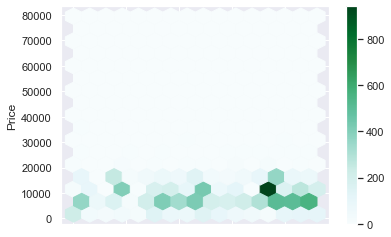

In [56]:
# Arrival_Time_hour Price Analysis as both are numerical columns will use hexbin plot
df.plot.hexbin(x='Arrival_Time_hour',y='Price',gridsize=15)

#### Observation: We can observe the above plot most of the price lies between 6000-20000

In [57]:
# Applying label encoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for i in ['Route1', 'Route2', 'Route3', 'Route4', 'Route5']:
    categorical[i]=encoder.fit_transform(categorical[i])

categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,0,34,8,13,5


In [58]:
#Dropping Additional_Info Column as its not much useful
drop_col(categorical,'Additional_Info')

In [59]:
categorical['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [60]:
# encoding Total stops
dict={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}
categorical['Total_Stops']=categorical['Total_Stops'].map(dict)
categorical['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10683, dtype: int64

In [61]:
drop_col(categorical,'Source')
drop_col(categorical,'Destination')
drop_col(categorical,'Airline')

###  Predicting Flight Fare Price.

In [62]:
final_df=pd.concat([categorical,Airline,source,destination,df[continuous_col]],axis=1)

In [63]:
pd.set_option('display.max_columns',None)
final_df.head()

,Total_Stops,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,3,1,16,50,21,35,4,45


In [64]:
#Check For Outliers
def plot(data,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sn.distplot(data[col],ax=ax1)
    sn.boxplot(data[col],ax=ax2)

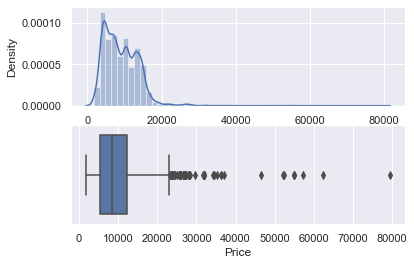

In [65]:
plot(final_df,'Price')

#### Handling outliers
* As there is some outliers in price feature,so we replace it with median.

In [66]:
final_df['Price']=np.where(final_df['Price']>=40000,final_df['Price'].median(),final_df['Price'])

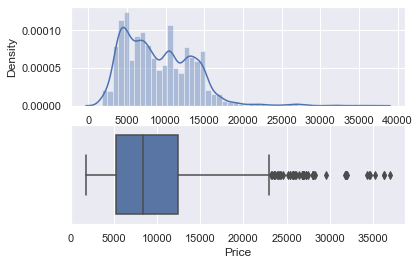

In [67]:
plot(final_df,'Price')

#### Seprate the dataset in X and Y columns for Modeling

In [68]:
X=final_df.drop('Price',axis=1)
y=df['Price']

### Feature Selection
* It is about finding the best feature and having good relation with independent variable
* Issue of dimensionality reduction reduces.
* For this we use mutual_info_classif

In [69]:
from sklearn.feature_selection import mutual_info_classif

In [70]:
mutual_info_classif(X,y)

array([2.15682827, 2.05764487, 2.79474215, 2.29211249, 1.50718519,
       0.67580222, 0.77938746, 0.10747572, 0.65194712, 0.9229313 ,
       0.        , 0.56364904, 0.01552718, 0.30905043, 0.        ,
       0.22043066, 0.00597111, 0.15878501, 1.51779644, 0.88555248,
       0.30106457, 1.54898553, 0.41470604, 0.28389472, 0.18088049,
       0.37689759, 1.07235359, 0.85995358, 1.46100865, 1.21477344,
       1.84132724, 1.51580408, 1.76810346, 1.07786418])

In [71]:
imp = pd.DataFrame(mutual_info_classif(X,y),index=X.columns)
imp

,0
Total_Stops,2.125892
Route1,2.006875
Route2,2.801119
Route3,2.333753
Route4,1.485547
Route5,0.744679
Air India,0.790589
GoAir,0.090864
IndiGo,0.669268
Jet Airways,0.952839


In [72]:
imp.columns=['importance']
imp.sort_values(by='importance',ascending=False)

,importance
Route2,2.801119
Route3,2.333753
Total_Stops,2.125892
Route1,2.006875
Arrival_Time_hour,1.841061
dur_hour,1.763830
Arrival_Time_min,1.581411
Delhi,1.562184
Cochin,1.559911
Route4,1.485547


* As we can see from the table, there are several features that have approx 0 value,so we should remove it after authorizing it.But for now,we are not removing it.

### Modeling

In [73]:
# spiliting the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=123)

In [74]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
def predict(ml_model):
    training_start = time.perf_counter()
    print('Model is: {}'.format(ml_model))
    model= ml_model.fit(X_train,y_train)
    training_end = time.perf_counter()
    prediction_start = time.perf_counter()
    print("Training score: {}".format(model.score(X_train,y_train)*100))
    predictions = model.predict(X_test)
    prediction_end = time.perf_counter()
    print("Predictions are: {}".format(predictions))
    print('\n')
    model_train_time = training_end-training_start
    model_prediction_time = prediction_end-prediction_start
    r2score=r2_score(y_test,predictions) 
    print("r2 score is: {}".format(r2score*100))
    
    print("Time consumed for training: %4.3f" % (model_train_time))
    print("Time consumed for prediction: %6.5f seconds" % (model_prediction_time))     
    print('MAE:{}'.format(mean_absolute_error(y_test,predictions)))
    print('MSE:{}'.format(mean_squared_error(y_test,predictions)))
    print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_test,predictions))))
     
    sn.distplot(y_test-predictions) 

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor

Model is: RandomForestRegressor()
Training score: 95.24565795862948
Predictions are: [ 3593.48        3902.21666667  2933.13666667 ... 10700.32
  9975.995       7373.45666667]


r2 score is: 82.55714716251397
Time consumed for training: 4.360
Time consumed for prediction: 0.29835 seconds
MAE:1153.4993607766953
MSE:3656340.8906215397
RMSE:1912.1560842728136


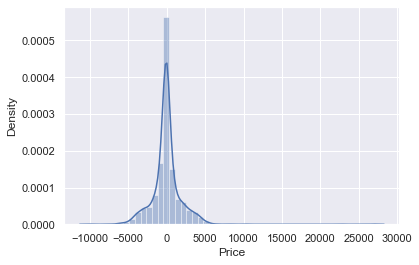

In [76]:
# Predict Flight fare using RandomForestRegressor
rf=RandomForestRegressor()
predict(rf)

Model is: LogisticRegression()
Training score: 34.60098291598408
Predictions are: [ 3597  4483  3175 ... 10262 10844  7229]


r2 score is: 35.623823041345794
Time consumed for training: 117.954
Time consumed for prediction: 0.24031 seconds
MAE:2052.6995788488534
MSE:13494423.784277024
RMSE:3673.4757089542627


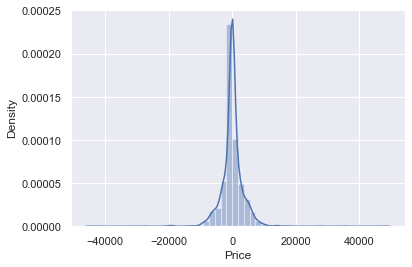

In [77]:
# Predict Flight fare using LogisticRegression
predict(LogisticRegression())

Model is: KNeighborsRegressor()
Training score: 75.20255835608349
Predictions are: [ 3701.4  4790.4  3115.  ... 11637.6 11875.6  5917.6]


r2 score is: 61.564106921393716
Time consumed for training: 0.005
Time consumed for prediction: 2.67855 seconds
MAE:1752.4253626579316
MSE:8056865.974861955
RMSE:2838.461903014017


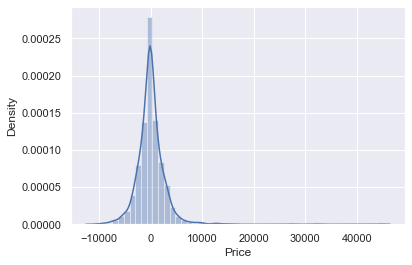

In [78]:
# Predict Flight fare using
predict(KNeighborsRegressor())

Model is: DecisionTreeRegressor()
Training score: 96.98984170339018
Predictions are: [ 3597.  4483.  2575. ... 13292.  8529.  8016.]


r2 score is: 72.96310493098576
Time consumed for training: 0.101
Time consumed for prediction: 0.02017 seconds
MAE:1343.9008267041022
MSE:5667427.565738055
RMSE:2380.635958255284


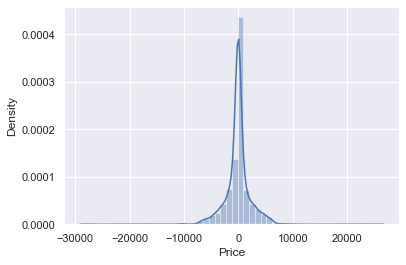

In [79]:
# Predict Flight fare using
predict(DecisionTreeRegressor())

Model is: SVR()
Training score: 4.020356199559172
Predictions are: [7858.2271478  7887.1059047  7835.28922594 ... 8575.36224501 8604.30958963
 7908.57502523]


r2 score is: 4.7322246556440355
Time consumed for training: 6.904
Time consumed for prediction: 14.87985 seconds
MAE:3382.262862454397
MSE:19969867.646966785
RMSE:4468.765785646724


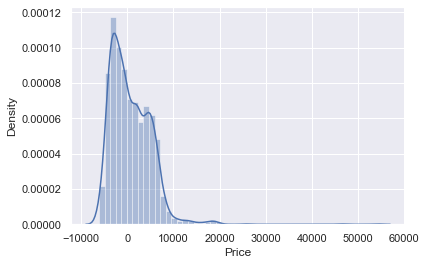

In [80]:
# Predict Flight fare using
from sklearn.svm import SVR
predict(SVR())

Model is: GradientBoostingRegressor()
Training score: 80.69069804122024
Predictions are: [ 4450.47340535  4623.71190155  3015.30172266 ... 11455.58002318
 11502.62825059  6587.18981084]


r2 score is: 78.64662339071805
Time consumed for training: 1.236
Time consumed for prediction: 0.02922 seconds
MAE:1461.1253014947613
MSE:4476058.1756196115
RMSE:2115.6696754502136


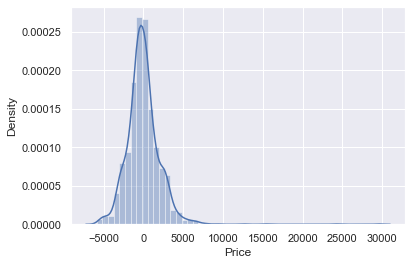

In [81]:
# Predict Flight fare using
predict(GradientBoostingRegressor())

### Hypertunning the model

###### In this grid search I will try different combinations of RF hyperparameters.

###### Most important hyperparameters of Random Forest:

###### n_estimators = n of trees
###### max_features = max number of features considered for splitting a node
###### max_depth = max number of levels in each decision tree
###### min_samples_split = min number of data points placed in a node before the node is split
###### min_samples_leaf = min number of data points allowed in a leaf node
###### bootstrap = method for sampling data points (with or without replacement)

#### Grid Search

In [82]:
from sklearn.model_selection import GridSearchCV

param_grid = [
{'n_estimators': [10, 25], 'max_features': [5, 10], 
 'max_depth': [10, 50, None], 'bootstrap': [True, False]}
]

grid_search_forest = GridSearchCV(rf, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search_forest.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid=[{'bootstrap': [True, False],
                          'max_depth': [10, 50, None], 'max_features': [5, 10],
                          'n_estimators': [10, 25]}],
             scoring='neg_mean_squared_error')

In [83]:
#now let's how the RMSE changes for each parameter configuration
cvres = grid_search_forest.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

2206.443046431288 {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 10}
2215.740848162221 {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 25}
2207.709465296018 {'bootstrap': True, 'max_depth': 10, 'max_features': 10, 'n_estimators': 10}
2055.942977516655 {'bootstrap': True, 'max_depth': 10, 'max_features': 10, 'n_estimators': 25}
2279.4364017534635 {'bootstrap': True, 'max_depth': 50, 'max_features': 5, 'n_estimators': 10}
2168.9059913455317 {'bootstrap': True, 'max_depth': 50, 'max_features': 5, 'n_estimators': 25}
2148.619255295016 {'bootstrap': True, 'max_depth': 50, 'max_features': 10, 'n_estimators': 10}
2135.3434348007827 {'bootstrap': True, 'max_depth': 50, 'max_features': 10, 'n_estimators': 25}
2256.0434744693357 {'bootstrap': True, 'max_depth': None, 'max_features': 5, 'n_estimators': 10}
2181.4541691799986 {'bootstrap': True, 'max_depth': None, 'max_features': 5, 'n_estimators': 25}
2168.7743046633964 {'bootstrap': True, 'max_dep

In [84]:
#find the best model of grid search
grid_search_forest.best_estimator_

RandomForestRegressor(bootstrap=False, max_depth=10, max_features=10,
                      n_estimators=25)

In [85]:
# Performance metrics
grid_best= grid_search_forest.best_estimator_.predict(X_train)
errors = abs(grid_best - y_train)
# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / y_train))
# Calculate and display accuracy
accuracy = 100 - mape    
#print result
print('The best model from grid-search has an accuracy of', round(accuracy, 2),'%')

The best model from grid-search has an accuracy of 87.04 %


In [86]:
#RMSE
grid_mse = mean_squared_error(y_train, grid_best)
grid_rmse = np.sqrt(grid_mse)
print('The best model from the grid search has a RMSE of', round(grid_rmse, 2))

The best model from the grid search has a RMSE of 1563.73


In [87]:
round(r2_score(y_train,grid_best)*100,2)

88.54

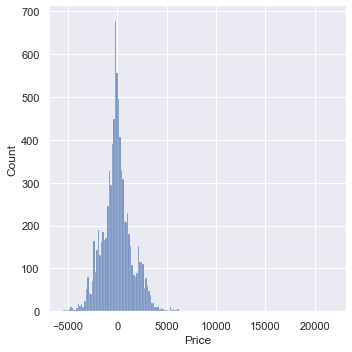

In [88]:
#distribution plot between actual value and predicted value
sn.displot(y_train-grid_best)

#### Randomized Search

In [89]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 45, num = 3)]
# Minimum number of samples required to split a node
min_samples_split = [5, 10]

In [90]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}

In [91]:
pprint(random_grid)

{'max_depth': [1, 23, 45],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [5, 10],
 'n_estimators': [20, 65, 110, 155, 200]}


In [92]:
# Use the random grid to search for best hyperparameters

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 10, verbose=2, random_state=42, n_jobs = -1, scoring='neg_mean_squared_error')
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [1, 23, 45],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10],
                                        'n_estimators': [20, 65, 110, 155,
                                                         200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [93]:
#now let's how the RMSE changes for each parameter configuration
cvres2 = rf_random.cv_results_
for mean_score, params in zip(cvres2["mean_test_score"], cvres2["params"]):
    print(np.sqrt(-mean_score), params)

3577.033124203844 {'n_estimators': 20, 'min_samples_split': 5, 'max_features': 'auto', 'max_depth': 1}
3580.4246896447453 {'n_estimators': 20, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 1}
2032.8599003409904 {'n_estimators': 65, 'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 23}
2027.9164217016353 {'n_estimators': 20, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 45}
3754.914889125713 {'n_estimators': 155, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 1}
2052.471440044754 {'n_estimators': 200, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 45}
2047.3425168416509 {'n_estimators': 155, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 23}
2013.657525197718 {'n_estimators': 155, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 45}
3757.9508347016063 {'n_estimators': 110, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 1}
2042.713895579706 {'n_estimators': 110, 'min_samples_s

In [94]:
# best random model 
rf_random.best_estimator_

RandomForestRegressor(max_depth=45, min_samples_split=10, n_estimators=155)

In [95]:
# best combination of parameters of random search
rf_random.best_params_

{'n_estimators': 155,
 'min_samples_split': 10,
 'max_features': 'auto',
 'max_depth': 45}

In [96]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=45, min_samples_split=10, n_estimators=155)

In [97]:
# Performance metrics (MAPE)
random_best= rf_random.best_estimator_.predict(X_train)
errors = abs(random_best - y_train)
# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / y_train))
# Calculate and display accuracy
accuracy = 100 - mape    
#print result
print('The best model from the randomized search has an accuracy of', round(accuracy, 2),'%')

The best model from the randomized search has an accuracy of 91.36 %


In [98]:
#this is the RMSE
final_mse = mean_squared_error(y_train, random_best)
final_rmse = np.sqrt(final_mse)
print('The best model from the randomized search has a RMSE of', round(final_rmse, 2))

The best model from the randomized search has a RMSE of 1316.35


* The best model from the randomized search has a RMSE of 1328.4

In [99]:
round(r2_score(y_train,random_best)*100,2)

91.88

#### After hypertuning,the accuracy increases

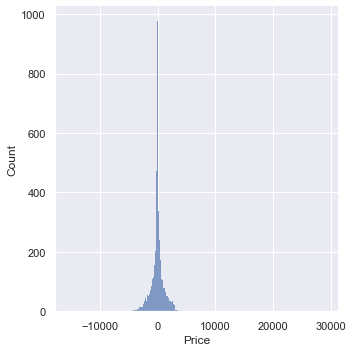

In [100]:
#distribution plot between actual value and predicted value
sn.displot(y_train-random_best)

#### Observation: We can see from the above plot that the predicted data is perfectly normally distributed

In conclusion, the metrics for our best models on the training set after our hyperparameter fine-tuning are the following:

Grid-search:
RMSE: 1569.12
accuracy (MAPE): 87.11 %
r2 Score:88.46
Randomized Search:
RMSE: 1328.4
accuracy: 91.37 %
r2 Score:91.73
    
This of course does not mean that the grid search is inherently inferior to  randomized-search.
Its just that in this notebook I used the information provided by the former to refine the latter.
In any case, this time I will consider the model obtained by the Randomized search as the best one.
First I will plot the feature importance for this model. 
This will give me precious insight to the most important factor in predicting our dependent variable Price. 
Then I will apply the model to the test set.

##### Feature Importance

In [101]:
# extract the numerical values of feature importance from the grid search
importances = rf_random.best_estimator_.feature_importances_

#create a feature list from the original dataset (list of columns)
# What are this numbers? Let's get back to the columns of the original dataset
feature_list = list(X.columns)

#create a list of tuples
feature_importance= sorted(zip(importances, feature_list), reverse=True)

#create two lists from the previous list of tuples
df = pd.DataFrame(feature_importance, columns=['importance', 'feature'])
importance= list(df['importance'])
feature= list(df['feature'])

#see df
print(df)

    importance                            feature
0     0.453123                           dur_hour
1     0.126831                        journey_day
2     0.069378                        Jet Airways
3     0.068917                      journey_month
4     0.055669               Jet Airways Business
5     0.040007                             Route2
6     0.025881                  Arrival_Time_hour
7     0.020915                  Multiple carriers
8     0.017965                        Total_Stops
9     0.017740                             Route4
10    0.016703                      Dep_Time_hour
11    0.016071                       Dep_Time_min
12    0.013399                   Arrival_Time_min
13    0.010784                            dur_min
14    0.008780                          Air India
15    0.008277                             Route3
16    0.004499                             IndiGo
17    0.003728                             Route1
18    0.003216                            Vistara


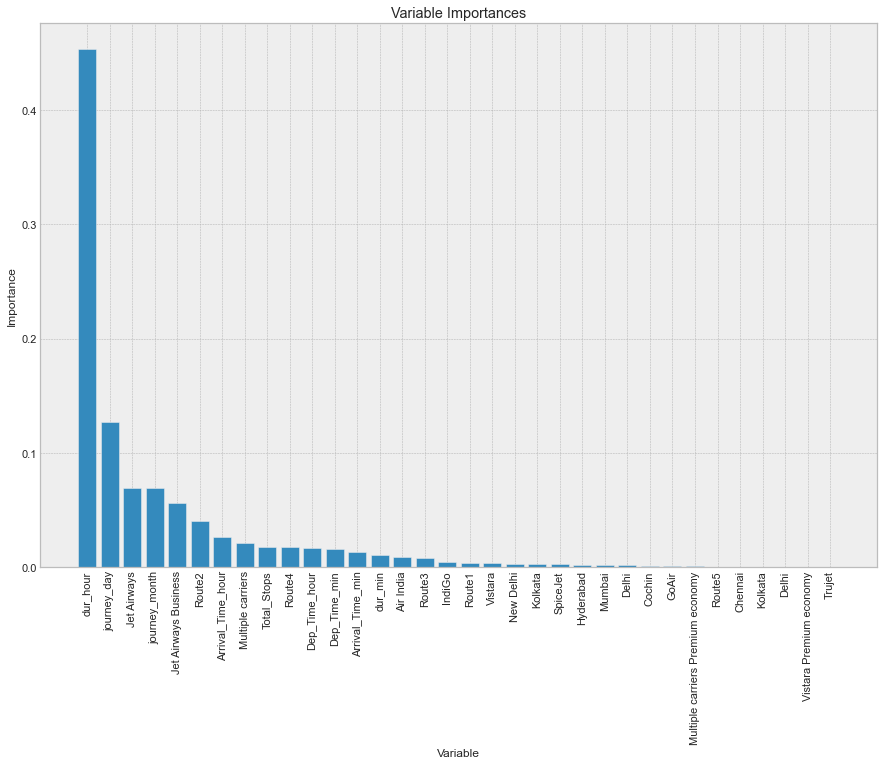

In [102]:
# Set the style
plt.style.use('bmh')
# list of x locations for plotting
x_values = list(range(len(feature_importance)))

# Make a bar chart
plt.figure(figsize=(15,10))
plt.bar(x_values, importance, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

* Observation:A future aim may be to cut the less relevant features (lets say we can drop some columns in terms of importance), estimate a new model and compare it with the old ones.
* I reckon it would lose predictive power, but on the other hand it would improve in terms of training speed.

###### In conclusion, these are my final considerations on the model:

* The best feature to reliably predict the Flight fare price is Type of dur_hour. After dur_hour there is a group of 6 features including: journey_day,Jet Airways,journey_month,Jet Airways Business,Route2,Arrival_Time_hour & Multiple carriers
* Trujet is the least relevant feature in this cluster.

#### Evaluate best model on the test set

In [103]:
final_model = rf_random.best_estimator_
# Predicting test set results
final_pred = final_model.predict(X_test)
final_mse = mean_squared_error(y_test, final_pred)
final_rmse = np.sqrt(final_mse)
print('The final RMSE on the test set is', round(final_rmse, 2))

The final RMSE on the test set is 1785.29


In [104]:
#calculate accuracy
errors = abs(final_pred - y_test)
# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / y_test))
# Calculate and display accuracy
accuracy = 100 - mape    
#print result
print('The best model achieves on the test set an accuracy of', round(accuracy, 2),'%')

The best model achieves on the test set an accuracy of 87.48 %


### As was to be expected, the performance drops considerably, but is still beyond 87%, which I consider a discrete result.

In [105]:
# Save the trained model as a pickle string.
FinalModel = pickle.dumps(final_model)
Final_mod_from_pickle = pickle.loads(FinalModel)
  
# Use the loaded model to make predictions
y_pred_test_Forestreg=Final_mod_from_pickle.predict(X)
y_pred_test_Forestreg

array([ 4635.38888173,  7784.36931452, 13666.80837607, ...,
        5988.66778832, 13515.86590751, 12024.99440065])

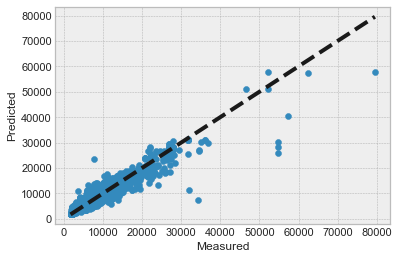

In [106]:
# cross_val_predict returns an array of the same size as `y` where each entry is a prediction obtained by cross validated:
predicted = y_pred_test_Forestreg

fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

### Conclusion:
#### * Columns like dur_hour,journey_day,Jet Airways,journey_month,Jet Airways Business,Route2,Arrival_Time_hour & Multiple carriers have effect on Flight Price.
#### * Choosing a Airline can significantly effect the flight fare and predicting it.
#### * The Actual vs Predicted plot clearly indicates the predicted values are almost linear hence performance of model is considerably Good
#### * Random Forest Regressor model predicts the Flight price more accurately than linear regression model